`**Complete Text Preprocessing**`

**General Feature Extraction**

* File Loading
* Word Counts
* Character Counts
* Average Character Count
* Stop Word Count
* Count # Hashtag and @ mention
* if numeric digits are present
* Upper case word Count

**Preprocessing and Cleaning**

* Lower case
* Contraction to expansion
* Emails removals and counts
* URl's removal and counts
* Removal of RT
* Removal of special characters
* Removal of multiple characters
* Removal of HTML tags
* Removal of accented characters
* Removal of Stop words
* Conversion into base form of words
* Common occuring words removal
* Words cloud 
* Spelling correction
* Tokenization
* Lemmatization
* Detecting Entities using NER
* Noun Detection
* Language Detection
* Sentence detection
* Using inbuilt Sentiment classifier


In [ ]:
import numpy as np
import pandas as pd
import spacy

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [198]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv') 
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [ ]:
df['sentiment'].value_counts()

0    2000
1    2000
Name: sentiment, dtype: int64

**Word Counts**

In [10]:
len('this is text : '.split())

4

In [35]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [36]:
df.sample(5)

,twitts,sentiment,word counts,char_counts,word_counts
2006,@Zwoise and your other matties ?,1,6,27,6
162,Crowd was insane. Good win... To be honest see...,0,17,80,17
220,@vishuxpert he he he.... sorry cant help you o...,0,15,75,15
3291,"@chriscyvas you know what, I returned that dam...",1,20,88,20
1297,All of the animals at the Wild Animal Park loo...,0,24,94,24


In [37]:
df['word counts'].max()

32

In [38]:
df['word counts'].min()

1

In [39]:
df[df]

ValueError: ignored

**Character Count**

In [40]:
len('this is')

7

In [41]:
def char_counts(x):
  s = x.split()
  x = ''.join(s)
  return len(x)

In [46]:
char_counts('this is')

6

In [43]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [47]:
df.sample(5)

,twitts,sentiment,word counts,char_counts,word_counts
1927,cant be bothered 2 get out of bed 2day - feeli...,0,16,56,16
1112,&quot;Bye Bye&quot; Cleveland...... ***Sassy***,0,4,44,4
3600,@johncmayer Like there was ever any doubt you ...,1,12,55,12
3891,@jsjv didi you wanna learn Italiano after watc...,1,17,98,17
505,upset people are mean to the point.,0,7,29,7


**Average Word Length**

In [48]:
x = 'this is' #6/2 =3
y = 'thankyou guys'  #12/2 = 6

In [49]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [50]:
df.sample(4)

,twitts,sentiment,word counts,char_counts,word_counts,avg_word_len
644,Gettin ready to go to work. sleepy as shit. G...,0,17,63,17,3.705882
3652,@equinox2009 Glad to hear it's going well and ...,1,15,72,15,4.800000
720,omg on my break its freaken busy tonite!!!!!!!!,0,8,40,8,5.000000
3953,@mikehernalsteen Google still seems to be the ...,1,10,49,10,4.900000


**Stop Words Count**

In [51]:
print(stopwords)

{'then', 'another', 'further', 'wherever', 'n’t', 'various', 'i', 'throughout', 'per', 'front', 'nowhere', 'move', 'where', 'seem', 'forty', 'many', 'eleven', 'few', 'yet', 'them', 'became', 'hundred', 'as', 'any', 'now', 'make', 'by', 'own', 'some', 'who', 'whence', 'becoming', 'alone', 'made', 'we', 'be', 'does', 'nine', 'sixty', 'but', 'must', 'whereafter', 'eight', 'too', 'herein', 'should', 'serious', 'whoever', 'give', 'himself', 'not', 'with', '’ve', 'such', 'enough', 'their', 'once', 'someone', 'could', 'nevertheless', 'if', 'have', 'us', 'behind', 'something', 'no', 'hereby', 'third', 'thru', 'our', "'ve", 'over', 'my', 'for', 'somewhere', 'fifty', 'almost', 'thence', 'how', 'whereas', 'before', 'beside', '‘d', 'elsewhere', '‘re', 'had', 'has', 'twenty', 'hers', 'that', 'even', '‘s', 'using', 'becomes', 'otherwise', "'re", 'none', 'formerly', 'only', 'each', 'ours', 'off', 'below', 'again', 'except', 'will', 'itself', '‘m', 'doing', 'which', 'neither', 'it', 'already', 'whose'

In [52]:
len(stopwords)

326

In [53]:
x = 'this is the text data'

In [55]:
x.split()

['this', 'is', 'the', 'text', 'data']

In [58]:
[t for t in x.split() if t in stopwords]

['this', 'is', 'the']

In [60]:
len([t for t in x.split() if t in stopwords])

3

In [61]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [62]:
df.sample(5)

,twitts,sentiment,word counts,char_counts,word_counts,avg_word_len,stop_words_len
3749,off for a swim Ahh i love the water,1,9,27,9,3.000000,5
3601,Travel blog up and running! http://charlenedi...,1,16,103,16,6.437500,6
3055,@WParenthetical Indeed. I'm thinking almost no...,1,20,111,20,5.550000,7
3364,LIz Hodgins is addicted to Twitter! Shes such ...,1,23,89,23,3.869565,11
927,@KarolinaGirlX @nikkidreams personally I prefe...,0,22,116,22,5.272727,6


**Count # HashTags and @Mentions**

In [63]:
x = 'this is #hasgtag and this is @mention'

In [64]:
x.split()

['this', 'is', '#hasgtag', 'and', 'this', 'is', '@mention']

In [65]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [66]:
len([t for t in x.split() if t.startswith('@')])

1

In [67]:
df['hashtag_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [68]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [69]:
df.sample(5)

,twitts,sentiment,word counts,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count
150,Just been for a jacuzzi. Now time to pack,0,9,33,9,3.666667,0,0
1777,@i140 MyLifeRecord ... a health/medical histo...,0,16,90,16,5.625000,1,0
1328,"@dannybelize oh well maybe July 30th,who know...",0,12,65,12,5.416667,1,0
286,"i'm tired, and have SAT testing tomorrow",0,7,34,7,4.857143,0,0
2168,Sweet success http://tinyurl.com/m4sowe,1,3,37,3,12.333333,0,0


**If numeric digits are present in twitts**

In [88]:
x = 'this is 1 and 2'

In [89]:
x.split()

['this', 'is', '1', 'and', '2']

In [82]:
x.isdigit()       #isdigit() = it check if specified no. is numeric then it give true and if it is character then false

False

In [90]:
x.split()[1].isdigit()

False

In [91]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [92]:
len([t for t in x.split() if t.isdigit()])

2

In [93]:
df['numeric_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [94]:
df.sample(5)

,twitts,sentiment,word counts,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,numeric_count
1693,Today hasn't gone off on the right foot at all...,0,22,83,22,3.772727,0,0,0
1735,@wolwol Crashed wol. No one survived,0,6,31,6,5.166667,1,0,0
3701,@ronni_xo lol @ whoever made that secret! moll...,1,15,61,15,4.066667,2,0,0
1546,The day I leave my car across the street all d...,0,30,107,30,3.566667,0,0,0
1501,omg the weather is perfect for bennington daze...,0,16,68,16,4.250000,0,0,0


**Upper case words count**

In [100]:
x = 'I AM HAPPY'
y = 'i am happy'

In [101]:
[t for t in x.split() if t.isupper()]  # isupper = if count upper cases

['I', 'AM', 'HAPPY']

In [102]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [105]:
df.sample(20)

,twitts,sentiment,word counts,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,numeric_count,upper_counts
3821,"Costa Mesa Speedway tonight, 500cc's, alcohol ...",1,20,111,20,5.550000,0,0,0,0
1130,All day I've been waiting on the WAS vs CHI ga...,0,17,61,17,3.588235,0,0,0,3
242,Had to take a sick day,0,6,17,6,2.833333,0,0,0,0
1585,I missed a thunder storm... sighhhhhh I love...,0,13,64,13,4.923077,0,0,0,2
3700,no one's happy. :/ there's so many people out ...,1,22,91,22,4.136364,0,0,0,0
1921,"Found aloe, so itchy.",0,4,18,4,4.500000,0,0,0,0
2824,Just got home from Winco,1,5,20,5,4.000000,0,0,0,0
2511,read! read!! read!!!,1,3,18,3,6.000000,0,0,0,0
2946,@MontanaOne Just for the record I don't believ...,1,20,107,20,5.350000,1,0,0,2
1440,@juderivera yup.. i hear you.. i hate it mysel...,0,14,57,14,4.071429,1,0,0,0


In [104]:
df.iloc[3962]['twitts']

'@DavidArchie Our local shows love tributes too much. True story! Will be watching SIS videos in Youtube later, haha '

**Preprocessing and Cleaning**

**Lower Case Conversion**

In [109]:
x = 'this is Text'

In [110]:
x.lower()

'this is text'

In [111]:
x = 45.0
str(x).lower

<function str.lower>

In [112]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [113]:
df.sample(5)

,twitts,sentiment,word counts,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,numeric_count,upper_counts
2640,watching the trailer of harry potter and the ...,1,10,54,10,5.400000,0,0,0,0
1942,google profiles... this is weird. http://googl...,0,11,82,11,7.454545,0,0,0,1
2055,churchh. then down to winthrop for hitting. me...,1,11,59,11,5.363636,0,0,0,0
1241,thinks its revision time,0,4,21,4,5.250000,0,0,0,0
460,dã©teste ana ivanovic eliminated at the french...,0,9,68,9,7.555556,0,0,0,2


**Contraction to expansion**-  It means common words in short form (i.e - don't, couldn't) and make it to expansion in normal form.

In [126]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [127]:
x = "i'm don't he'll"  # 'i am do not he well'

In [137]:
def count_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key ,value)
    return x
  else:
    return x

In [133]:
count_to_exp(x)

'i am do not he will'

In [134]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: count_to_exp(x))

10 loops, best of 5: 88.9 ms per loop


In [135]:
df.sample(5)

,twitts,sentiment,word counts,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,numeric_count,upper_counts
343,"@colderice will listening from my phone today,...",0,25,111,25,4.440000,1,1,0,1
116,"twitter, would not you allow me to change my p...",0,9,39,9,4.333333,0,0,0,0
3853,life is fuckin sexy going to bed,1,7,26,7,3.714286,0,0,0,0
3078,@bgardner i am kind of enjoying hearing it all,1,8,38,8,4.750000,1,0,0,0
3978,well confessions will be kept in private conve...,1,17,76,17,4.470588,0,0,0,1


**Count and Remove Emails**

In [199]:
import re

In [200]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment
3713,@securerecs arghh Me Please markbradbury_16@h...,1


In [201]:
df.iloc[3713]['twitts']


'@securerecs arghh Me Please  markbradbury_16@hotmail.com'

In [202]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [203]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x)

['markbradbury_16@hotmail.com']

In [204]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)',x))

In [205]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [206]:
df[df['emails_count']>0]

,twitts,sentiment,emails,emails_count
3713,@securerecs arghh Me Please markbradbury_16@h...,1,[markbradbury_16@hotmail.com],1


In [207]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)','',x)

'@securerecs arghh me please  '

In [208]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)','',x))

In [209]:
df[df['emails_count']>0]

,twitts,sentiment,emails,emails_count
3713,@securerecs arghh Me Please,1,[markbradbury_16@hotmail.com],1


**Count URLs and Remove it**

In [211]:
x = 'hi, thanks to watching it, for more visit https://www.youtube.com/watch?v=EItlUEPCIzM&t=204s'

In [212]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'www.youtube.com', '/watch?v=EItlUEPCIzM&t=204s')]

In [214]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [215]:
x

'hi, thanks to watching it, for more visit https://www.youtube.com/watch?v=EItlUEPCIzM&t=204s'

In [219]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x)

'hi, thanks to watching it, for more visit '

In [220]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x))

In [223]:
df.sample(5)

,twitts,sentiment,emails,emails_count,url_flags
3632,"@bunnykins2 Yep, PNR = Paranormal Romance, you...",1,[],0,0
234,Out getting ice creamm!!... So tired,0,[],0,0
120,@megpoynter i misss youuu ima see you tomrrow...,0,[],0,0
2028,"@tonycupcakes good to be home, I see",1,[],0,0
2003,nap time. all this pettiness has worn me out,1,[],0,0


**Remove RT**

RT - It bassically a format(read text) 

In [228]:
df[df['twitts'].str.contains('rt')]

,twitts,sentiment,emails,emails_count,url_flags
4,@mandagoforth me bad! It's funny though. Zacha...,0,[],0,0
23,"ut oh, I wonder if the RAM on the desktop is s...",0,[],0,0
59,@paulmccourt dunno what sky you're looking at!...,0,[],0,0
75,Im back home in Belfast im realli tired thoug...,0,[],0,0
81,@lilmonkee987 i know what you mean... i feel s...,0,[],0,0
...,...,...,...,...,...
3913,For The Press So After She Recovered She Kille...,1,[],0,0
3919,earned her CPR &amp; First Aid certifications!,1,[],0,0
3945,"@teciav &quot;i look high, i look low, i look ...",1,[],0,0
3951,I am soo very parched. And hungry. Oh and I'm ...,1,[],0,0


In [225]:
x = 'rt @username: hello hirt'

In [226]:
re.sub(r'\brt\b', '',x).strip()

'@username: hello hirt'

In [229]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b', '',x).strip())

In [230]:
df.sample(5)

,twitts,sentiment,emails,emails_count,url_flags
595,I have a tummy ache :&gt; LUZ &lt;:,0,[],0,0
2147,@Trapes lol - how long do you walk for? Do you...,1,[],0,0
3872,@AmyLee_3 maybe i should watch too...i might l...,1,[],0,0
3596,@valcontreras yes i am at work,1,[],0,0
2090,@phoenix_life you too! I'll be on again tomorrow,1,[],0,0


**Special Character and Sample Removal**

In [231]:
df.sample(3)

,twitts,sentiment,emails,emails_count,url_flags
215,Aww man! The Space Shuttle Endeavour launch wa...,0,[],0,0
346,had nightmares about roaches last night. also ...,0,[],0,0
509,Finding out why people always have to play mus...,0,[],0,0


In [233]:
x = '@duyku apparrently i was not ready enough.. i...'

In [234]:
re.sub(r'[^\w ]+','',x)

'duyku apparrently i was not ready enough i'

In [235]:
df.sample(5)

,twitts,sentiment,emails,emails_count,url_flags
548,"@cyphersushi no, I'm afraid not.But! Go here:...",0,[],0,1
2338,"Not that I am but &quot;I love love, I love be...",1,[],0,1
2543,&quot;Everybody's Free (To Feel Good)&quot; - ...,1,[],0,1
1823,@Jonasbrothers the app never works for me,0,[],0,0
204,@sross4 why?,0,[],0,0


In [236]:
df['twitts'] = df['twitts'].apply(lambda x:re.sub(r'[^\w ]+','',x))

In [237]:
df.sample(5)

,twitts,sentiment,emails,emails_count,url_flags
1898,lenos last show tonight,0,[],0,0
1960,i cant feel that it is the summer holidays WH...,0,[],0,0
1393,sowrongitsjason OHMY who was she I am soooooo ...,0,[],0,0
3583,Good morning Im very happy today Im at Lengu...,1,[],0,0
1074,iamfacemelter Awesome man Damn wish I lived do...,0,[],0,0


**Removing mulyiple spaces 'hi hello'**

In [242]:
x = 'hi    hello   how are you'

In [244]:
 ' '.join(x.split())

'hi hello how are you'

In [245]:
df['twitts'] = df['twitts'].apply(lambda x:  ' '.join(x.split()))

In [246]:
df.sample(5)

,twitts,sentiment,emails,emails_count,url_flags
1055,Live_for_Films Yeah its fantastic bit of a blu...,0,[],0,0
1500,torhart i used my teef whiteners now my teeth ...,0,[],0,0
1811,stopped out of CAR at 470,0,[],0,0
2177,utaia thats cool i can live with that you have...,1,[],0,0
1912,My girl wants me to start wearing t shirts to ...,0,[],0,0


**Remove HTMl Tags**

In [247]:
from bs4 import BeautifulSoup

In [248]:
x = '<html><h1> thanks for watching it </h1></html>'

In [249]:
x.replace('<html><h1>', '').replace('</h1></html>','')

' thanks for watching it '

In [251]:
BeautifulSoup(x,'lxml').get_text().strip()

'thanks for watching it'

In [252]:
%%time
df['twitts'] = df['twitts'].apply(lambda x:  BeautifulSoup(x,'lxml').get_text().strip())

CPU times: user 1.47 s, sys: 64 ms, total: 1.54 s
Wall time: 1.96 s


**Removal of accented characters**

In [258]:
x = 'Áccěntěd těxt'

In [259]:
import unicodedata

In [260]:
def remove_accented_chars(x):
  x = unicodedata.normalize('NFKD', x).encode('ascii','ignore').decode('utf-8', 'ignore')
  return x

In [261]:
remove_accented_chars(x)

'Accented text'

In [262]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

**Remove Stop words**

In [299]:
x = 'this is a stop words'

In [300]:
' '.join([t for t in x.split() if t not in stopwords])

'stop words'

In [302]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [303]:
df.sample(5)

,twitts,sentiment,emails,emails_count,url_flags,twitts_no_stop
573,oh my what a night haha Kasey and I are stay d...,0,[],0,0,oh night haha Kasey I stay downstairs 4 mom gi...
2796,oh squidbillie your mindless entertainment is ...,1,[],0,0,oh squidbillie mindless entertainment apprecia...
354,not look forward to work but i can not avoid i...,0,[],0,0,look forward work avoid longer
637,thecrackedactor very very true,0,[],0,0,thecrackedactor true
2710,play dumb really do have its advantage should ...,1,[],0,0,play dumb advantage try long ago


**Convert into base or root from of word**

In [283]:
nlp = spacy.load('en_core_web_sm')

In [284]:
x = 'this is chocolate. what is time? this balls'

In [285]:
def make_to_base(x):
  x = str(x)
  x_list = []
  doc = nlp(x)
  
  for token in doc: 
    lemma = token.lemma_
    if lemma == '-PRON-' or lemma == 'be':
      lemma =  token.text

    x_list.append(lemma)
  return ' '.join(x_list)

In [286]:
make_to_base(x)

'this is chocolate . what is time ? this ball'

In [287]:
df['twitts'] = df['twitts'].apply(lambda x:  make_to_base(x))

In [288]:
df.sample(5)

,twitts,sentiment,emails,emails_count,url_flags,twitts_no_stop
2370,talindab You re totally an awesome person,1,[],0,0,talindab You re totally an awesome person
1361,hyperglobalmega I was asleep by the time you s...,0,[],0,0,hyperglobalmega I was asleep by the time you s...
2124,Ahhhhh I love the bay,1,[],0,0,Ahhhhh I love the bay
753,work out my relationship issue with Kaze It do...,0,[],0,0,work out my relationship issue with Kaze It do...
2694,mikedeleon hey hey hey hye3heyyyy I love you,1,[],0,0,mikedeleon hey hey hey hye3heyyyy I love you


**Common words removal**

In [289]:
x = 'this is this okay bye'

In [290]:
text = ' '.join(df['twitts'])

In [291]:
len(text)

272062

In [292]:
text = text.split()

In [293]:
len(text)

53987

In [297]:
freq_comm = pd.Series(text).value_counts()

In [307]:
f20 = freq_comm[:20]
f20

I       1597
to      1460
the     1299
a        962
i        884
not      882
my       734
and      709
you      704
have     692
do       606
is       588
in       571
it       542
for      521
of       482
go       475
m        467
that     458
get      436
dtype: int64

In [305]:
df['twitts'] = df['twitts'].apply(lambda x:  ' '.join([t for t in x.split() if t not in f20]))

In [306]:
df.sample(5)

,twitts,sentiment,emails,emails_count,url_flags,twitts_no_stop
1647,haz headache,0,[],0,0,I haz headache
783,Jesslina sorry forget reply My phone trippin t...,0,[],0,0,Jesslina m sorry I forget reply My phone tripp...
766,Bern_morley Mee too,0,[],0,0,Bern_morley Mee
522,would like see nickjonas kevinjonas yunno othe...,0,[],0,0,I like nickjonas kevinjonas yunno ticket
2092,Random Shot when was bored,1,[],0,1,Random Shot bored


**Rare words removal**

In [311]:
rare20 = freq_comm.tail(20)
rare20

RachieTartz       1
therebecca        1
06260407          1
sohotel           1
Italy             1
majatutaja        1
beg               1
sablevenus        1
swiss             1
4ish              1
MandyRae          1
asia              1
desperate         1
sheep             1
citizen           1
Canadamust        1
BEDA              1
maureenjohnson    1
istock            1
rerunlovin        1
dtype: int64

In [312]:
df['twitts'] = df['twitts'].apply(lambda x:  ' '.join([t for t in x.split() if t not in rare20]))

In [313]:
df.sample(5)

,twitts,sentiment,emails,emails_count,url_flags,twitts_no_stop
3557,panchos with morton,1,[],0,0,panchos morton
3773,YoungCash hey stranger sooo was invite this event,1,[],0,0,YoungCash hey stranger I sooo invite event
3857,twitter suck only on here follow Ellen Oprah S...,1,[],0,0,twitter suck I m follow Ellen Oprah Shane I fo...
3793,IS lame Liz lol should send care package full ...,1,[],0,0,IS lame Liz lol I send care package Starbucks ...
3059,want change up hair againn looove how add am a...,1,[],0,0,want change hair againn looove add hair eat pa...


**Word Cloud Visualization**

In [314]:
!pip install wordcloud

In [316]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [317]:
text = ' '.join(df['twitts'])

In [318]:
len(text)

223737

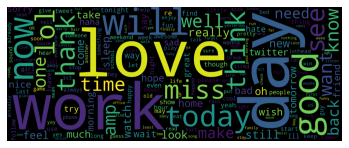

In [320]:
wc = WordCloud(width=5000, height=2000).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

**Spelling Correction**

In [321]:
!pip install -U textblob

     |████████████████████████████████| 636 kB 5.1 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [322]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [323]:
from textblob import TextBlob

In [342]:
x = 'thanks finih  fogivvee forr waching it'

In [343]:
x = TextBlob(x).correct()
x

TextBlob("thanks finish  fogivvee for watching it")

**Tokenization using TextBlob**

In [344]:
x = 'thanks#watching this video. Please like it'

In [345]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'Please', 'like', 'it'])

In [347]:
doc = nlp(x)
for token in doc:
  print(token)

thanks#watching
this
video
.
Please
like
it


**Detecting Nouns**

In [348]:
x = 'Breaking News: ponal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [350]:
doc = nlp(x)

for noun in doc.noun_chunks:
  print(noun)

Breaking News
ponal Trump
the president
the USA
a deal
the moon


**Language Translation Detection**

In [351]:
x = we are all stand 

'Breaking News: ponal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [352]:
tb = TextBlob(x)

**Use TextBlob's Inbuilt Sentiment Classifier**

In [360]:
from textblob.sentiments import NaiveBayesAnalyzer

In [361]:
x = 'we all stands together. we are gonna kill this fight'

In [362]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [363]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8609835297507018, p_neg=0.13901647024929897)